In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
busstop = pd.read_excel('C:/Users/admin/Desktop/WithU-HJ/data/버스노선.xlsx')
busstop.head()

,BUSLINENUM,ORD,NAME,SIGUNNAME,GUNAME,DONGNAME,X,Y,UNIQUEID,BUSSTOPID
0,10,1,연제공용버스차고지,부산광역시,연제구,NaN,129.053172,35.185243,13179,50000001059
1,10,2,초읍고개,부산광역시,연제구,NaN,129.054089,35.185475,13183,50000002492
2,10,3,개인택시조합,부산광역시,연제구,거제2동,129.055711,35.186786,13132,21130521003
3,10,4,부산의료원,부산광역시,연제구,거제2동,129.060579,35.188257,13123,21130521007
4,10,5,삼정그린아파트,부산광역시,연제구,거제2동,129.063026,35.189483,13029,21130521008


In [4]:
busstop_cnt = busstop.groupby(['BUSLINENUM'])['NAME'].count()
busstop_cnt

BUSLINENUM
10          118
100         128
100-1       124
1000         80
1000(심야)    138
           ... 
9           101
90           24
96          105
96-1         99
99           67
Name: NAME, Length: 164, dtype: int64

In [5]:
busstop_cnt = busstop_cnt.to_frame(name='cnt')
busstop_cnt

,cnt
BUSLINENUM,
10,118
100,128
100-1,124
1000,80
1000(심야),138
...,...
9,101
90,24
96,105


In [6]:
busstop_cnt.to_csv('C:/Users/admin/Desktop/WithU-HJ/Bus_route/res/busstop_cnt.csv')

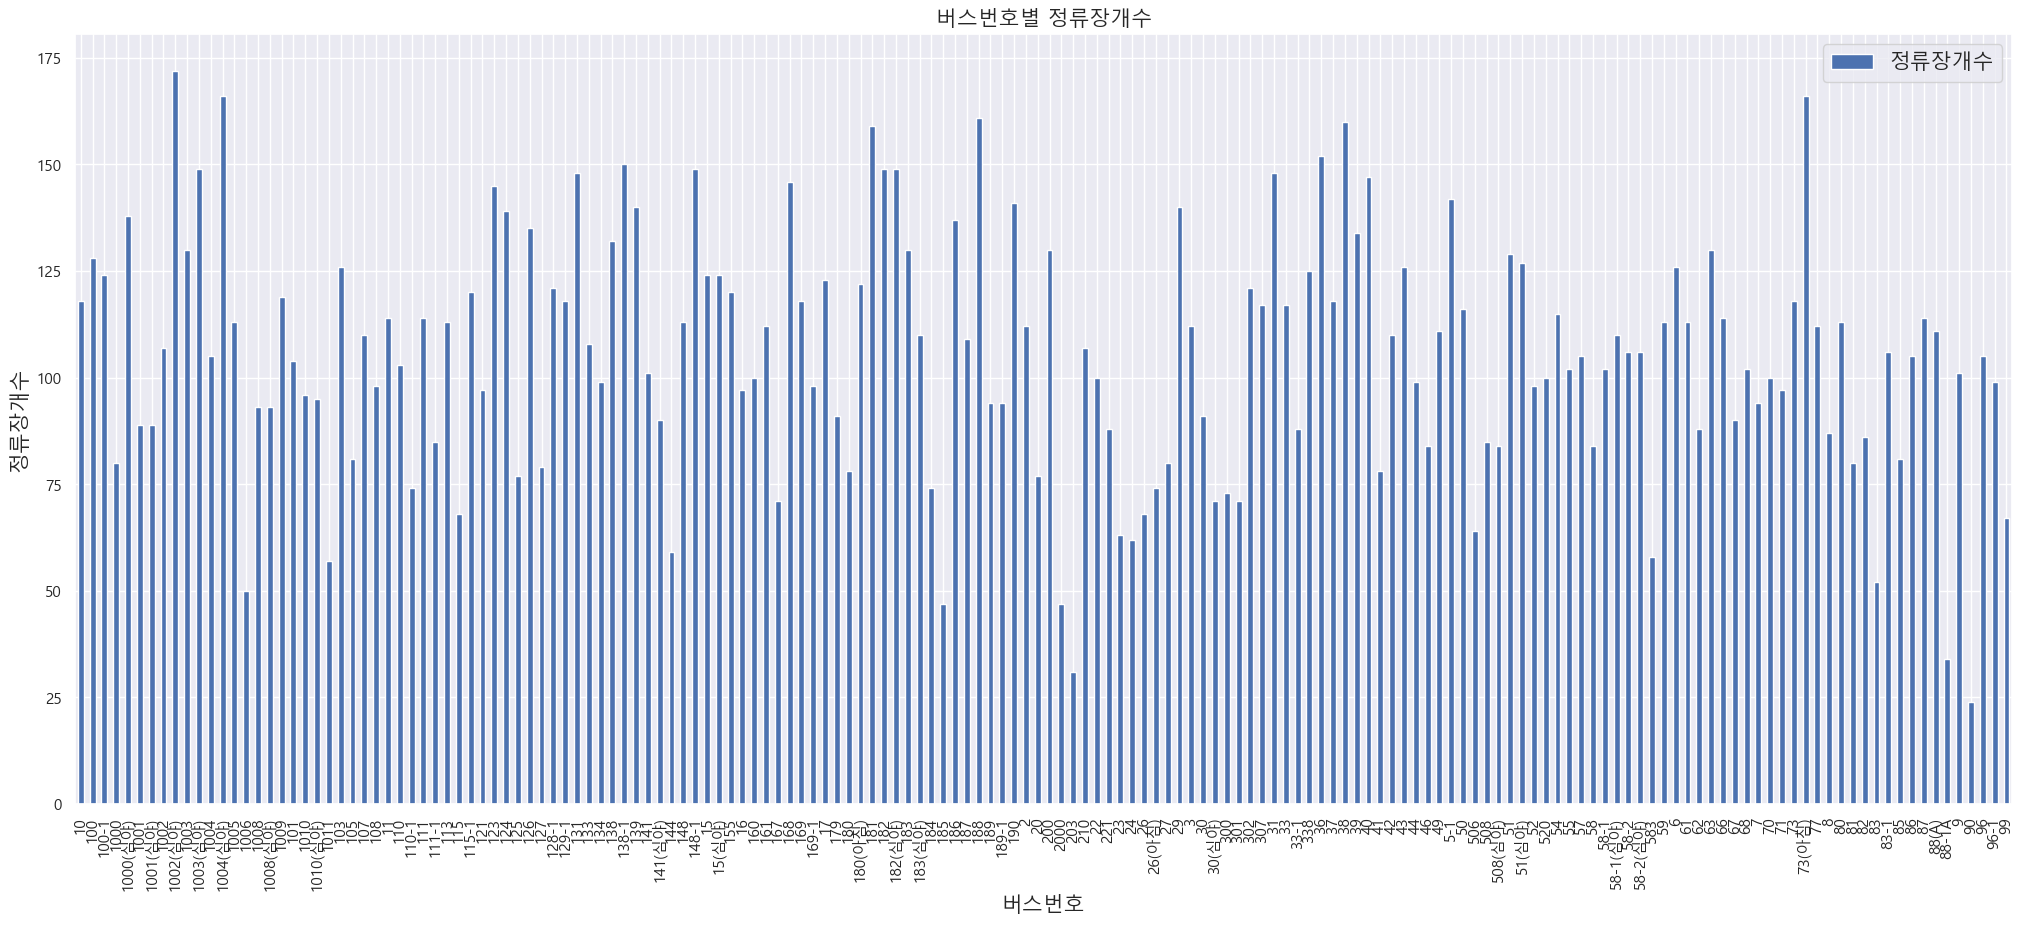

In [7]:
count = busstop_cnt[['cnt']]
plt.rcParams['figure.figsize'] = (25,10)
count.plot(kind='bar', rot=90)
plt.title(f'버스번호별 정류장개수', fontsize=15)
plt.xlabel('버스번호', fontsize=15)
plt.ylabel('정류장개수', fontsize=15)
plt.legend(['정류장개수'], fontsize=15)
plt.show()

In [8]:
busstop_cnt.describe()

,cnt
count,164.000000
mean,105.439024
std,28.241334
min,24.000000
25%,88.000000
50%,106.000000
75%,123.250000
max,172.000000


# 급행버스

In [14]:
busstop_ep = busstop[(busstop['BUSLINENUM'] == '1000') | (busstop['BUSLINENUM'] == '1001') | (busstop['BUSLINENUM'] == '1002') | (busstop['BUSLINENUM'] == '1003') | (busstop['BUSLINENUM'] == '1004') | (busstop['BUSLINENUM'] == '1005') | (busstop['BUSLINENUM'] == '1006') | (busstop['BUSLINENUM'] == '1008') | (busstop['BUSLINENUM'] == '1009') | (busstop['BUSLINENUM'] == '1010') | (busstop['BUSLINENUM'] == '1011') | (busstop['BUSLINENUM'] == '2000')]
busstop_ep

,BUSLINENUM,ORD,NAME,SIGUNNAME,GUNAME,DONGNAME,X,Y,UNIQUEID,BUSSTOPID
370,1000,1,다대포,부산광역시,사하구,다대1동,128.961603,35.049335,NaN,21100621006
371,1000,2,다대포해수욕장역,부산광역시,사하구,다대1동,128.965308,35.048235,10200,21100621021
372,1000,3,다대포해수욕장,부산광역시,사하구,다대1동,128.970094,35.049065,10192,21100621020
373,1000,4,다대자유아파트,부산광역시,사하구,다대1동,128.970965,35.051573,10190,21100621024
374,1000,5,다대우신아파트,부산광역시,사하구,다대1동,128.970774,35.054727,10187,21100621025
...,...,...,...,...,...,...,...,...,...,...
9260,2000,43,삼성자동차정문,부산광역시,강서구,녹산동,128.876739,35.088815,12070,21120561048
9261,2000,44,명지신도시,부산광역시,강서구,명지동,128.902431,35.088856,12060,21120541012
9262,2000,45,명지새동네,부산광역시,강서구,명지동,128.930807,35.108554,12037,21120541003
9263,2000,46,을숙도문화회관,부산광역시,사하구,하단1동,128.946898,35.107773,10224,21100561002


In [15]:
busstop_ep_cnt = busstop_ep.groupby(['BUSLINENUM'])['NAME'].count()
busstop_ep_cnt

BUSLINENUM
1000     80
1001     89
1002    107
1003    130
1004    105
1005    113
1006     50
1008     93
1009    119
1010     96
1011     57
2000     47
Name: NAME, dtype: int64

In [16]:
busstop_ep_cnt = busstop_ep_cnt.to_frame(name='cnt')
busstop_ep_cnt

,cnt
BUSLINENUM,
1000,80
1001,89
1002,107
1003,130
1004,105
1005,113
1006,50
1008,93
1009,119


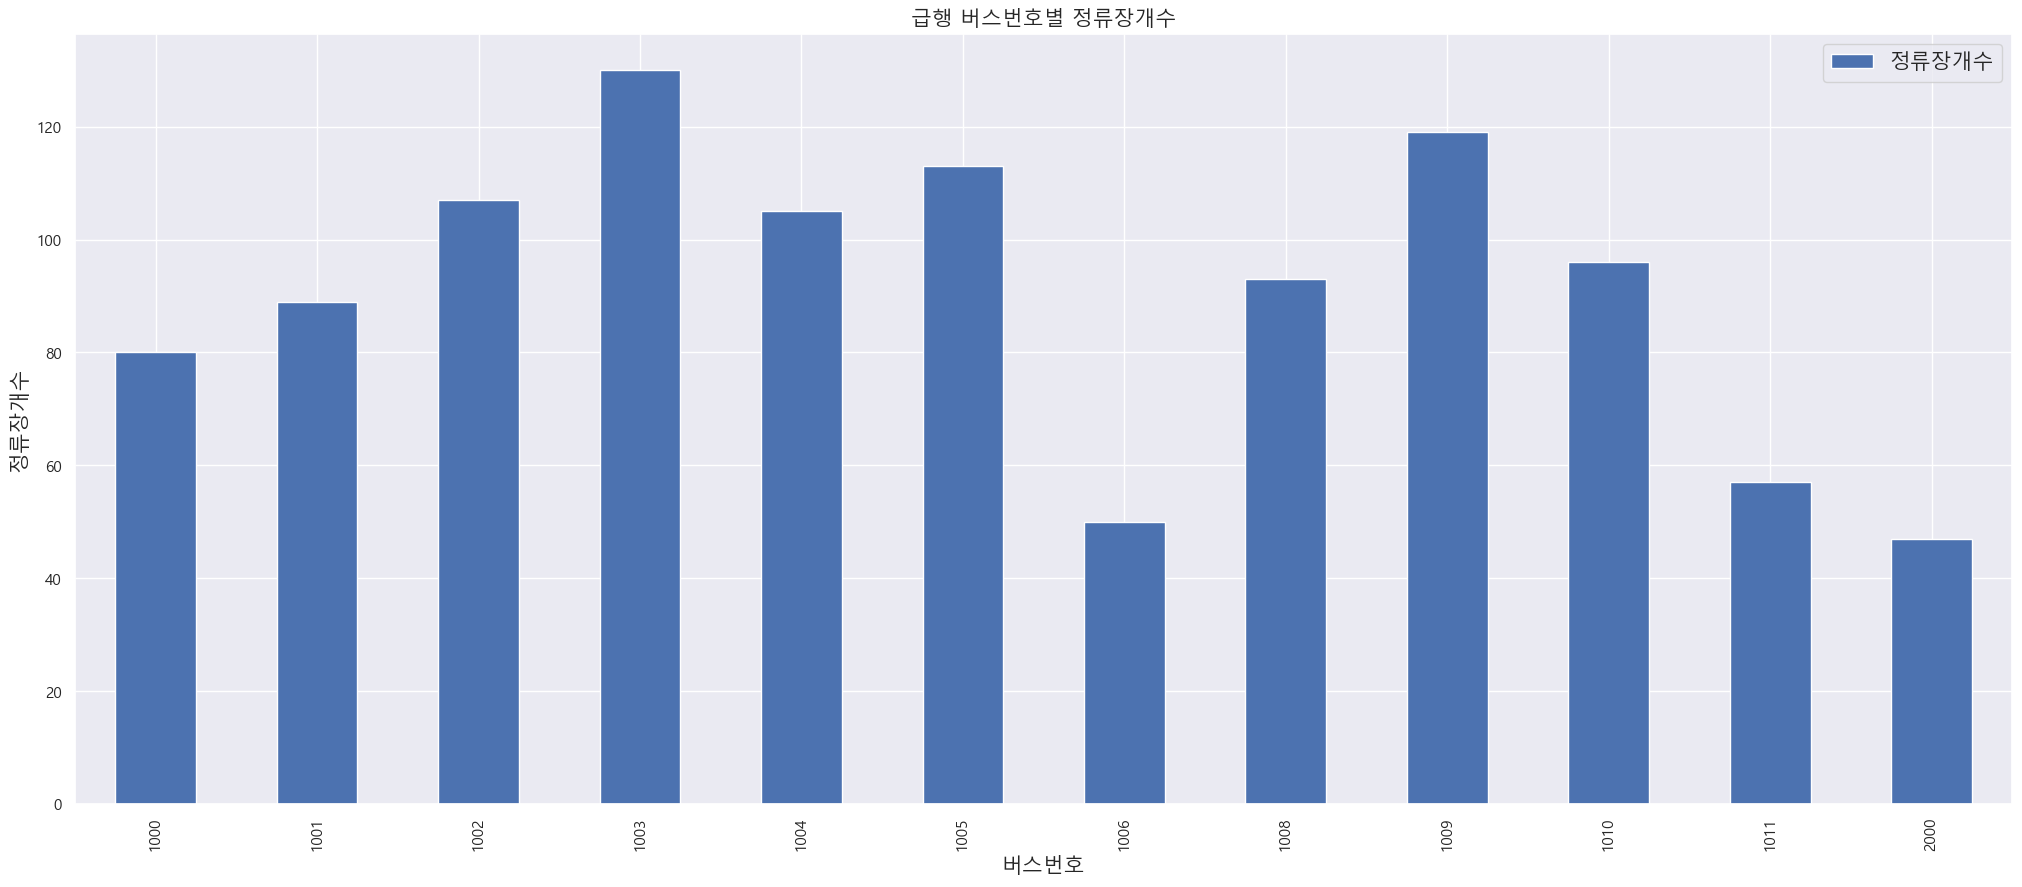

In [17]:
count = busstop_ep_cnt[['cnt']]
plt.rcParams['figure.figsize'] = (25,10)
count.plot(kind='bar', rot=90)
plt.title(f'급행 버스번호별 정류장개수', fontsize=15)
plt.xlabel('버스번호', fontsize=15)
plt.ylabel('정류장개수', fontsize=15)
plt.legend(['정류장개수'], fontsize=15)
plt.show()

In [18]:
busstop_ep_cnt.describe()

,cnt
count,12.000000
mean,90.500000
std,27.244683
min,47.000000
25%,74.250000
50%,94.500000
75%,108.500000
max,130.000000
